<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

To evaluate how our models would perform on new data, we split our data into a training set and a test set, train only on the training set, and evaluate on the test set. In $k$-fold cross validation we repeat this process $k$ times, using a different subset of our data as the test set each time.

We use this process to compare multiple models on the same data set. Those models could be variations on a single type (e.g. linear regression models with and without a particular feature), or they could be of completely different types.

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Practice

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston.

In [1]:
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

- Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)
- Scatterplot of each column with median price

In [3]:
#shape of X and y where X is the data set and y is original median price for houses.
print(X.shape)

print(y.shape)

(506, 13)
(506, 1)


In [4]:
#data types for the dataset
print(X.dtypes)

print(y.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object
MEDV    float64
dtype: object


In [5]:
#below are the count of null values in each of X and y dataset
print(X.isnull().sum())
print(y.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64
MEDV    0
dtype: int64


In [6]:
# below are the basic summary stats for all the columns for X and y
print(X.describe())

print(y.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [7]:
# here are the number of unique values for each column
print(X.nunique())
print(y.nunique())

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
dtype: int64
MEDV    229
dtype: int64


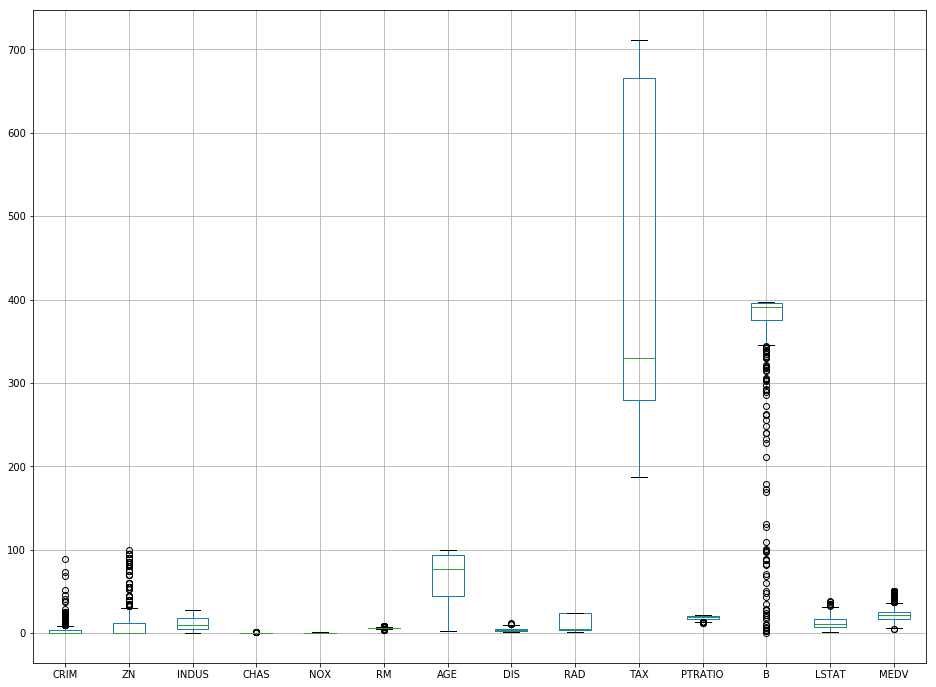

In [8]:
# Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)
boston_data = pd.concat([X, y], axis=1)
feature = ['CRIM', 'ZN', 'INDUS','CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

#boston_data.boxplot(column ='PRATIO', figsize=(10, 8))
boston_data.boxplot(column=['CRIM', 'ZN', 'INDUS','CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], figsize=(16, 12))


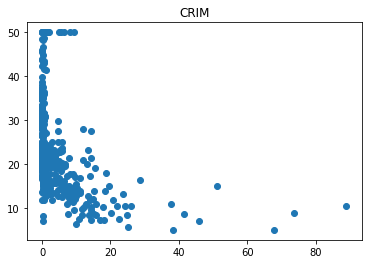

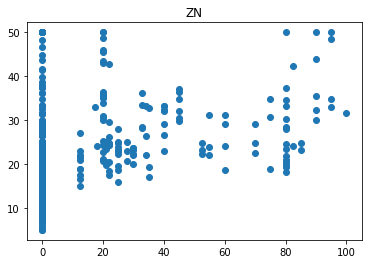

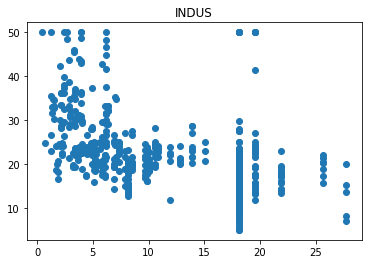

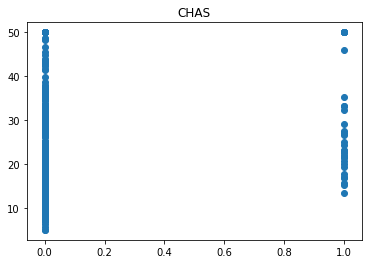

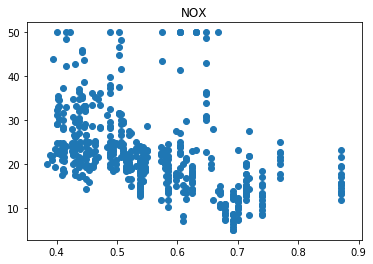

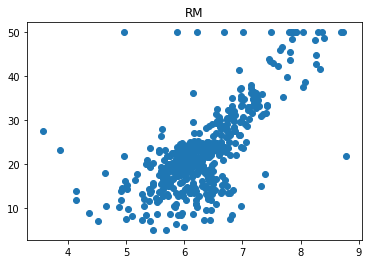

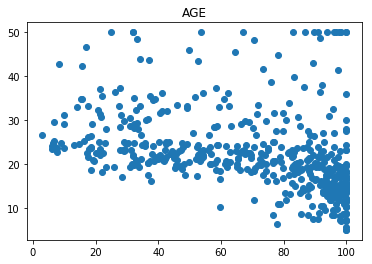

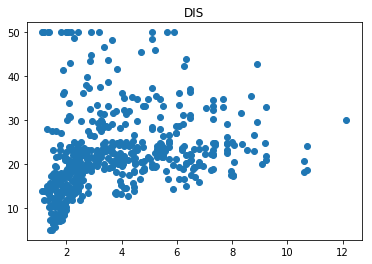

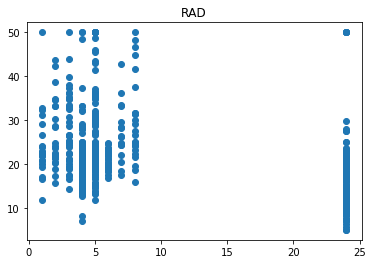

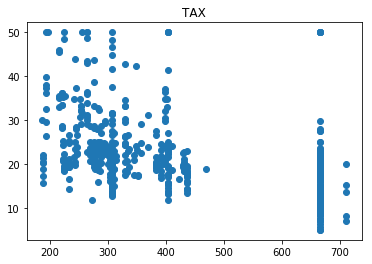

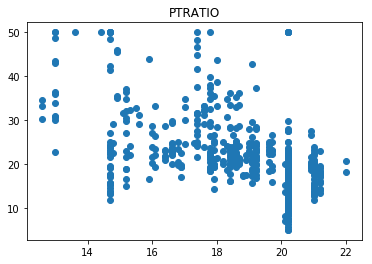

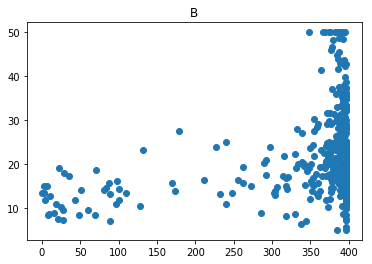

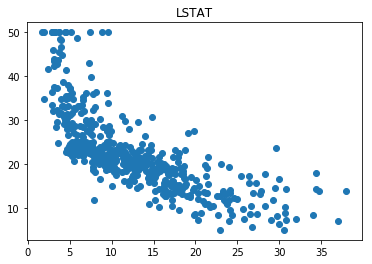

In [9]:
#Scatterplot of each column with median price
y = boston_data.loc[:, 'MEDV']
feature = ['CRIM', 'ZN', 'INDUS','CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
for i in feature:
    x = boston_data.loc[:, i]
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.set_title(i)




- Get the MSE of a null model that simply predicts the mean value of MEDV. (You could do a train/test split here, but it won't make much difference for such a simple model.)

In [10]:
from sklearn import metrics

null_pred = np.zeros(len(y)) - np.mean(y)
null_mse = metrics.mean_squared_error(null_pred, y)
print(null_mse)

2115.3289995156956


- Develop a linear regression model to predict MEDV. Train it on 70% of the data. Gets its MSE on both that 70% and the other 30%.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#X = boston_data.drop(['B', 'CHAS','MEDV', 'ZN'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_test = linreg.predict(X_test)
y_pred_train = linreg.predict(X_train)

MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)

print(MSE_train)
print(MSE_test)

20.197702348676366
28.37644965546656


In [12]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


- K-fold cross-validation is slower than a simple train/test split, but it gives more reliable estimates of generalization error. Use ten-fold cross-validation to evaluate your model's MSE on both training and test data. Use this result to answer the following questions.

In [13]:
from sklearn import model_selection
kf = model_selection.KFold(n_splits=10, shuffle=True)
mse_values_test = []
mse_values_train = []

n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index, :], y.iloc[train_index])
    
    mse_values_test.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index, :])))
    mse_values_train.append(metrics.mean_squared_error(y.iloc[train_index], lr.predict(X.iloc[train_index, :])))
    
    n += 1
    print('Model {}'.format(n))
    print('MSE_test: {}'.format(mse_values_test[n-1]))
    print('MSE_train: {}'.format(mse_values_train[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE_test for all folds: {}'.format(np.mean(mse_values_test)))
print('Mean of MSE_train for all folds: {}'.format(np.mean(mse_values_train)))



~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE_test: 25.9550962969755
MSE_train: 21.58821446190564
Model 2
MSE_test: 31.295720642844206
MSE_train: 21.050423035279096
Model 3
MSE_test: 18.701545161004095
MSE_train: 22.3199716354402
Model 4
MSE_test: 19.0734250717017
MSE_train: 22.30953113523895
Model 5
MSE_test: 19.112023493000454
MSE_train: 22.29802291635007
Model 6
MSE_test: 31.472761583000356
MSE_train: 20.886883937614094
Model 7
MSE_test: 19.151699798984385
MSE_train: 22.332473713262964
Model 8
MSE_test: 33.694715237050325
MSE_train: 20.69485123291951
Model 9
MSE_test: 23.525818467235283
MSE_train: 21.881243147679264
Model 10
MSE_test: 16.226000610633253
MSE_train: 22.621304229146418
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE_test for all folds: 23.820880636242958
Mean of MSE_train for all folds: 21.798291944483623


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

The 10 fold model gives us a significant decrease in MSE compared to our null model. The test data is slightly higher than the training data on 10 fold average which seems right. As bias has significantly increased becasue of low difference in training and test dataset.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

On a 10 fold cross validation, we have seen a low variance as for each fold on test set as MSE on the training set is similar while on test set, the MSE changes more frequently on each fold.

- How much of a bias problem does your model appear to have? Why do you say that?

there is a high bias if there is a low difference between the training and test set, as the data underfits the data with the avialable feature variable and cannot generalize.

- How much of a variance problem does your model appear to have? Why do you say that?

Its a low variance model as the difference between test and training is not much. 

- Add or remove variables from your model to address this problem, and get its test-set MSE using ten-fold cross validation. Did your model get better or worse? By how much?

When i tried removing X = boston_data.drop(['B', 'CHAS','MEDV', 'ZN'], axis=1) these variables, my MSE for the test set increases from 28 to 30 while the MSE for the training was not affected. 

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

Tip: Look at scatterplots of MEDV against your column(s) before and after applying the transformation. The transformation should help if it makes the relationship more linear.

# KNN Practice

In [14]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [15]:
iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [16]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

- Map each iris species to a number. Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and assign the result to a column called 'species_num'.

In [17]:
iris.loc[:, 'species_num'] = iris.loc[:, 'species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

- Clean Up Data and Perform Exporatory Data Analysis

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot) grouped by species

In [18]:
print(iris.shape)
print(iris.dtypes)
print(iris.isnull().sum())
print(iris.describe())
print(iris.nunique())

(150, 6)
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
species_num       int64
dtype: object
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
species_num     0
dtype: int64
       sepal_length  sepal_width  petal_length  petal_width  species_num
count    150.000000   150.000000    150.000000   150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667     1.000000
std        0.828066     0.433594      1.764420     0.763161     0.819232
min        4.300000     2.000000      1.000000     0.100000     0.000000
25%        5.100000     2.800000      1.600000     0.300000     0.000000
50%        5.800000     3.000000      4.350000     1.300000     1.000000
75%        6.400000     3.300000      5.100000     1.800000     2.000000
max        7.900000     4.400000      6.900000     2.500000     2.000000
sepal_length    35
sepal_width     23
petal_length    4

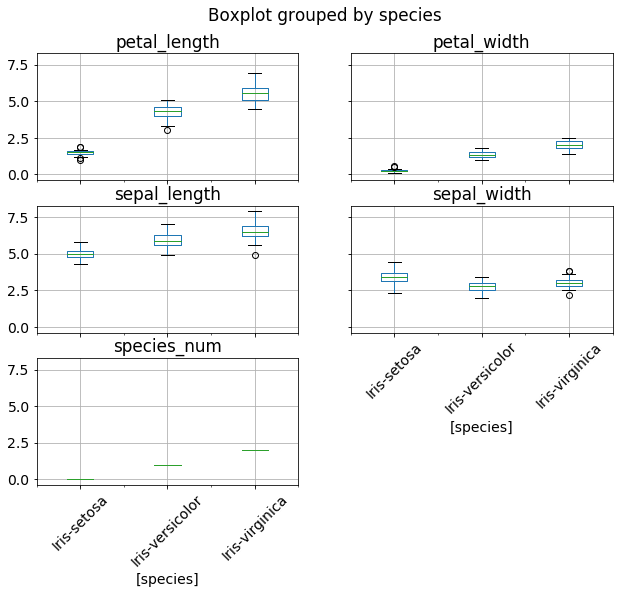

In [19]:
ax = iris.boxplot(by='species', rot=45, figsize=(10, 8));

- Get the accuracy of a null model that simply predicts the most common species.

In [20]:
from sklearn import metrics

feature_cols = ['petal_length', 'petal_width']
X = iris.loc[:, feature_cols]
y = iris.loc[:, 'species_num']

null_pred = np.zeros(len(y)) 
null_accuracy= metrics.accuracy_score(null_pred, y)
print(null_accuracy)

0.3333333333333333


- Develop a KNN model to predict species. Use ten-fold cross-validation to evaluate your model's accuracy on both training and test data. Remember to standardize your feature variables!

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

feature_cols = ['petal_length', 'petal_width']
X = iris.loc[:, feature_cols]
y = iris.loc[:, 'species_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, shuffle=True)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))


0.9473684210526315


In [56]:
from sklearn import model_selection
kf = model_selection.KFold(n_splits=10, shuffle=True)
Accuracy_test_knn = []
Accuracy_train_knn = []

n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    KNN = knn.fit(X.iloc[train_index, :], y.iloc[train_index])
    
    Accuracy_test_knn.append(metrics.accuracy_score(y.iloc[test_index], knn.predict(X.iloc[test_index, :])))
    Accuracy_train_knn.append(metrics.accuracy_score(y.iloc[train_index], knn.predict(X.iloc[train_index, :])))
    
    n += 1
    print('Model {}'.format(n))
    print('Accuracy_test_knn: {}'.format(Accuracy_test_knn[n-1]))
    print('Accuracy_train_knn: {}'.format(Accuracy_train_knn[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of Accuracy_test_knn for all folds: {}'.format(np.mean(Accuracy_test_knn)))
print('Mean of Accuracy_train_knn for all folds: {}'.format(np.mean(Accuracy_train_knn)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
Accuracy_test_knn: 1.0
Accuracy_train_knn: 0.9481481481481482
Model 2
Accuracy_test_knn: 0.9333333333333333
Accuracy_train_knn: 0.9629629629629629
Model 3
Accuracy_test_knn: 0.9333333333333333
Accuracy_train_knn: 0.9629629629629629
Model 4
Accuracy_test_knn: 0.9333333333333333
Accuracy_train_knn: 0.9555555555555556
Model 5
Accuracy_test_knn: 1.0
Accuracy_train_knn: 0.9555555555555556
Model 6
Accuracy_test_knn: 0.9333333333333333
Accuracy_train_knn: 0.9703703703703703
Model 7
Accuracy_test_knn: 1.0
Accuracy_train_knn: 0.9555555555555556
Model 8
Accuracy_test_knn: 0.8666666666666667
Accuracy_train_knn: 0.9703703703703703
Model 9
Accuracy_test_knn: 1.0
Accuracy_train_knn: 0.9629629629629629
Model 10
Accuracy_test_knn: 0.9333333333333333
Accuracy_train_knn: 0.9629629629629629
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of Accuracy_test_knn for all folds: 0.9533333333333334
Mean of Accuracy_train_knn for all folds: 0.9607407407407409


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

In comparision ot the null model, our model of KNN and 10 fold cross validation performed closed to 3 times better. While comparing with the null model, we have low bias and low variance. 

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

For High Bias, there will be very little gap between Training and Testing Scores. This is because in High Bias scenarios, the model underfits the data and also cannot generalize the data well.

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

The model has a high bias problem becasue of little gap between Training and Testing Scores with our model. 

- Adjust $k$ to address this problem, and get the resulting test-set accuracy using ten-fold cross validation. Did your model get better or worse? By how much?

In [47]:
# Calculate TRAINING ACCURACY and TESTING ACCURACY for K=1 through 100.
# /scrub/
Accuracy_test = []
Accuracy_train = []

for k in range(1, 100):
    test_scores_train = []
    test_scores_test = []
    
  
    knn = KNeighborsClassifier(n_neighbors=k)
    for train_index, test_index in kf.split(X, y):
        KNN = knn.fit(X.iloc[train_index, :], y.iloc[train_index])

        test_scores_test.append(metrics.accuracy_score(y.iloc[test_index], knn.predict(X.iloc[test_index, :])))
        test_scores_train.append(metrics.accuracy_score(y.iloc[train_index], knn.predict(X.iloc[train_index, :])))
    

       # print('Value of K {}'.format(k))
       # print('Accuracy_scores_test: {}'.format(test_scores_test[n-1]))
       # print('Accuracy_score_train: {}'.format(test_scores_train[n-1]))
    Accuracy_test.append(np.mean(test_scores_test))
    Accuracy_train.append(np.mean(test_scores_train))

    #print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
    print('Value of K {}'.format(k))
    print('Mean of Accuracy_scores_test for all folds: {}'.format(np.mean(test_scores_test)))
    test_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Mean of Accuracy_score_train for all folds: {}'.format(np.mean(test_scores_train)))

Value of K 1
Mean of Accuracy_scores_test for all folds: 0.9666666666666666
Mean of Accuracy_score_train for all folds: 0.9933333333333332
Value of K 2
Mean of Accuracy_scores_test for all folds: 0.9466666666666667
Mean of Accuracy_score_train for all folds: 0.9740740740740741
Value of K 3
Mean of Accuracy_scores_test for all folds: 0.96
Mean of Accuracy_score_train for all folds: 0.9792592592592593
Value of K 4
Mean of Accuracy_scores_test for all folds: 0.96
Mean of Accuracy_score_train for all folds: 0.9725925925925927
Value of K 5
Mean of Accuracy_scores_test for all folds: 0.96
Mean of Accuracy_score_train for all folds: 0.9622222222222222
Value of K 6
Mean of Accuracy_scores_test for all folds: 0.9533333333333334
Mean of Accuracy_score_train for all folds: 0.9674074074074074
Value of K 7
Mean of Accuracy_scores_test for all folds: 0.96
Mean of Accuracy_score_train for all folds: 0.9644444444444445
Value of K 8
Mean of Accuracy_scores_test for all folds: 0.96
Mean of Accuracy_scor

Value of K 63
Mean of Accuracy_scores_test for all folds: 0.9466666666666667
Mean of Accuracy_score_train for all folds: 0.9555555555555555
Value of K 64
Mean of Accuracy_scores_test for all folds: 0.9400000000000001
Mean of Accuracy_score_train for all folds: 0.9555555555555555
Value of K 65
Mean of Accuracy_scores_test for all folds: 0.9400000000000001
Mean of Accuracy_score_train for all folds: 0.9585185185185185
Value of K 66
Mean of Accuracy_scores_test for all folds: 0.9533333333333335
Mean of Accuracy_score_train for all folds: 0.9548148148148148
Value of K 67
Mean of Accuracy_scores_test for all folds: 0.96
Mean of Accuracy_score_train for all folds: 0.9570370370370371
Value of K 68
Mean of Accuracy_scores_test for all folds: 0.9533333333333334
Mean of Accuracy_score_train for all folds: 0.9548148148148148
Value of K 69
Mean of Accuracy_scores_test for all folds: 0.96
Mean of Accuracy_score_train for all folds: 0.9555555555555555
Value of K 70
Mean of Accuracy_scores_test for a

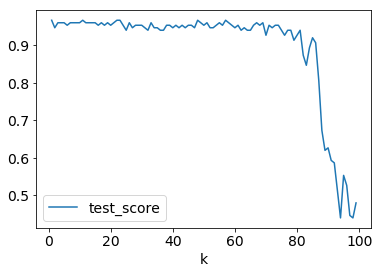

In [53]:
# Find the minimum testing error and the associated K value.
# /scrub/
scores_df.loc[:, 'test_score'] = Accuracy_test
ax = scores_df.plot(kind='line', x='k', y='test_score')


Our model is better for most part of the k value but once you increase after 80, the accuracy drops significantly.

- Plot your model's test-set accuracy across a range of $k$ values using ten-fold cross validation. Use a large enough range of $k$ values to provide reasonable assurance that making $k$ larger would not help.

Tip: Use functions and loops to avoid writing duplicate code.

In [54]:
scores_df.sort_values('test_score', ascending=False).head()

,k,train_score,test_score
21,22,0.960000,0.966667
56,57,0.960000,0.966667
22,23,0.960000,0.966667
10,11,0.960000,0.966667
0,1,0.993333,0.966667


- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

## Bonus

`scikit-learn` is the most popular machine learning library in Python, but there are alternative packages that have different strengths. 

### Example: Using the Statsmodels Formula

In [24]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.loc[:, 'MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [25]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1220.
Date:                Sun, 19 Aug 2018   Prob (F-statistic):          1.59e-321
Time:                        15:34:32   Log-Likelihood:                -1567.7
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     498   BIC:                             3185.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9744      0.224     22.197      0.000       4.534       5.415
LSTAT         -0.5615      0.048    -11.817      0.000      -0.655      -0.468
RAD            0.2109      0.070      3.025      0.003       0.074       0.348
TAX           -0.0174      0.004     -4.267      0.000      -0.025      -0.009
NOX            4.3456      3.385      1.284      0.200      -2.305      10.997
INDUS          0.0925      0.067      1.385      0.167      -0.039       0.224
CRIM          -0.0866      0.037     -2.362      0.019      -0.159      -0.015
ZN             0.0288      0.013      2.215      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.072   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              831.634
Skew:                           1.665   Prob(JB):                    2.59e-181
Kurtosis:                       8.325   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

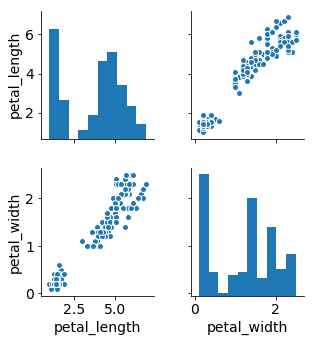

In [26]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [27]:
# Check out Pearson scores


### Demo: Patsy

In [28]:
import patsy

# Add response to the core DataFrame
df.loc[:, 'MEDV'] = y

In [29]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


/home/siddharth/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [30]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.10124414042083829
